In [1]:
import pandas as pd
import os 
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import expert
import imp; _ = imp.reload(expert) 

## Prepare data
- load nodes and edges
- define the savedir path where the merged node and edge files should be saved as you iterate 

In [3]:
datasource = 'Arxiv'
savedir = f'example_data/{datasource}_merged/'


nodes, edges = expert.metadata.publications.loadData(datasource, 
                                                     datadir=f'example_data/{datasource}_sample/')

2021-06-08 20:37:49.218607
Node Files:
	example_data/Arxiv_deduplicated/Arxiv_Nodes_Topic.jsonl
	example_data/Arxiv_deduplicated/Arxiv_Nodes_Scientist.jsonl
	example_data/Arxiv_deduplicated/Arxiv_Nodes_Source.jsonl
	example_data/Arxiv_deduplicated/Arxiv_Nodes_Paper.jsonl

Edge Files:
	example_data/Arxiv_deduplicated/Arxiv_Links_Related To.jsonl
	example_data/Arxiv_deduplicated/Arxiv_Links_Author Of.jsonl
	example_data/Arxiv_deduplicated/Arxiv_Links_Published In.jsonl
2021-06-08 20:37:49.221173

Loading nodes...
(164634, 7)
           nodeType
Scientist     99579
Paper         37093
Source        26496
Topic          1466
2021-06-08 20:37:50.646958

Loading edges...
(354547, 6)
              edgeType
Author Of       200467
Related To      127429
Published In     26651


In [4]:
savedir

'example_data/Arxiv_merged/'

## Instantiate iterativeMerger object
- Required: 
    - **nodes** - nodes dataframe
    - **edges** - edges dataframe
    - **savedir** - directory to save merged nodes/edges and merge history to
    - **field** - Specifying the nodeType you want to merge (i.e. 'Scientist') 
    - **chunksize** - Specifying the number of nodes to work with in each chunk 
- Optional: 
     - **saveprefix** - Specifying a prefix to the node/edge files as they are saved (e.g. the datasource name in this example)

In [5]:
field = 'Scientist'
imerge = expert.entity_resolution.interactiveMerger(nodes, edges, savedir, field, 
                                                    chunksize=1000, saveprefix=datasource)

  0%|          | 0/1000 [00:00<?, ?it/s]

setting up chunks for new iteration...
shuffle rows...
Adding edges to name graph...


 67%|██████▋   | 666/1000 [00:00<00:00, 3373.32it/s]

Getting name part pair connectivities...


100%|██████████| 1000/1000 [00:00<00:00, 3628.17it/s]


1000 Nodes in Chunk 0
Character-level tfidf...

  4%|▍         | 42/998 [00:00<00:02, 416.69it/s]

0.21 s...23 pairs
Word-level tfidf...0.01 s
Levenshtein...0.01 s
Name parts similarity...0.01 s
Initials...
0.01 s
Name likelihoods...

100%|██████████| 998/998 [00:02<00:00, 448.08it/s]


2.26 s
23 pairs

 0:00:02.510550
1000 Nodes in Chunk 0
Constructing coauthor graph...15.96 s
Projecting graph...0.09 s
Getting path lengths...0.00 s

Constructing colleague graph...0.05 s
Projecting graph...0.01 s
Getting path lengths...0.00 s


 0:00:16.311937
Starting Iteration 0..


The interactiveMerger class will deduplicate edges/nodes that have the same properties (displayName, address, nodeType, etc.) under multiple nodeIDs or in multiple edge records

## Identify constraints

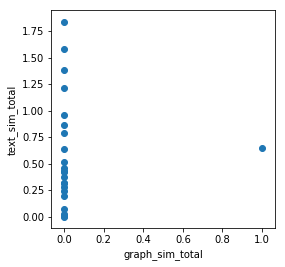

In [8]:
imerge.simScatter()

### Resolve matched identities using the IdentityMatcher widget 
By default, **.resolve** uses **metric='text_sim_total'** and **constraints={'text_sim_total':2,'graph_sim_total':0}** but you can pass different metrics/constraints. 

E.g., **imerge.resolve(metric='text_sim_total', constraints={'text_sim_total':2,'graph_sim_total':-1})**

In [6]:
# default constraints require graph similarity in the context graph, 
# e.g. shared co-authors, institutions
imerge.resolve()

IdentityMatcher(component='IdentityMatcher', props={'tree': [], 'clusters': [], 'context': {}, 'display': {}, …

In [11]:
imerge.resolve(constraints={'text_sim_total':1,'graph_sim_total':-1})

IdentityMatcher(component='IdentityMatcher', props={'tree': [['Arxiv-Scientist Zhong Chen 118402', 'Arxiv-Scie…

You can see the strong_groups from the IdentityMatcher widget using **imerge.widget.strong_groups**

In [11]:
imerge.widget.strong_groups

[{'Arxiv-Scientist Pascal J. Elahi 137636',
  'Arxiv-Scientist Pascal Jahan Elahi 10991'},
 {'Arxiv-Scientist D. Ruschel Dutra 1611',
  'Arxiv-Scientist D. Ruschel-Dutra 123980'},
 {'Arxiv-Scientist Carole E. Tucker 37485',
  'Arxiv-Scientist Carole Tucker 43148'}]

### Merge the nodes using the results of your widget interactions. 
By default, only the strong_groups from the IdentityMatcher are merged. However, you can set the parameter **weak=True** to also merge the weak_groups from the IdentityMatcher (i.e. **imerge.merge(weak=True)**)

In [12]:
imerge.merge()

Before merging there are 999 nodes and 354,547 edges


  0%|          | 0/1000 [00:00<?, ?it/s]

After merging there are 996 nodes and 354,547 edges
Reduction:
	 -3 (-0.3%)
	 -0 (-0.0%)




Active Chunk is now Chunk 1
1000 Nodes in Chunk 1
Adding edges to name graph...


 40%|███▉      | 396/1000 [00:00<00:00, 2006.58it/s]

Getting name part pair connectivities...


100%|██████████| 1000/1000 [00:00<00:00, 2041.25it/s]


Character-level tfidf...

  3%|▎         | 32/1000 [00:00<00:03, 315.00it/s]

0.31 s...33 pairs
Word-level tfidf...0.01 s
Levenshtein...0.00 s
Initials...
0.01 s
Name parts similarity...0.01 s
Name likelihoods...

100%|██████████| 1000/1000 [00:03<00:00, 311.06it/s]


3.28 s
33 pairs

 0:00:03.640835
1000 Nodes in Chunk 1
{'nodes': ['Scientist', 'Paper'], 'hops': 2}
Constructing coauthor graph...26.55 s
Projecting graph...0.10 s
Getting path lengths...0.01 s
{'nodes': ['Scientist', 'Institution'], 'hops': 1}
Constructing colleague graph...0.06 s
Projecting graph...0.01 s
Getting path lengths...0.00 s

 0:00:26.951106


### Resolve matched identities for next chunk of nodes
**.merge()** updates the interactiveMerger to consider the next chunk, or prints a notification that you have merged all available chunks in the current iteration

In [13]:
imerge.resolve()

IdentityMatcher(component='IdentityMatcher', props={'tree': [['Arxiv-Scientist D. A. Semenov 149981', 'Arxiv-S…

In [14]:
imerge.merge()

Before merging there are 1,000 nodes and 354,547 edges


  0%|          | 0/1000 [00:00<?, ?it/s]

After merging there are 999 nodes and 354,547 edges
Reduction:
	 -1 (-0.1%)
	 -0 (-0.0%)




Active Chunk is now Chunk 2
1000 Nodes in Chunk 2
Adding edges to name graph...


 42%|████▏     | 417/1000 [00:00<00:00, 2061.94it/s]

Getting name part pair connectivities...


100%|██████████| 1000/1000 [00:00<00:00, 2052.74it/s]


Character-level tfidf...

  3%|▎         | 30/999 [00:00<00:03, 294.17it/s]

0.31 s...15 pairs
Word-level tfidf...0.01 s
Levenshtein...0.00 s
Initials...
0.01 s
Name parts similarity...0.01 s
Name likelihoods...

100%|██████████| 999/999 [00:03<00:00, 301.64it/s]


3.38 s
15 pairs

 0:00:03.729756
1000 Nodes in Chunk 2
{'nodes': ['Scientist', 'Paper'], 'hops': 2}
Constructing coauthor graph...26.79 s
Projecting graph...0.09 s
Getting path lengths...0.00 s
{'nodes': ['Scientist', 'Institution'], 'hops': 1}
Constructing colleague graph...0.07 s
Projecting graph...0.01 s
Getting path lengths...0.00 s

 0:00:27.182973



### You can start the next iteration (combining all node chunks and generating new chunks of chunksize to work with) using .nextIteration() -- the iterative merger will shuffle the rows of the dataframe at each iteration so you can iterate through different chunks of nodes

You can also specify a new chunksize for the next iteration using **.nextIteration(chunksize=newChunksize)**

In [15]:
imerge.nextIteration()

shuffle rows...


/home/glen075/expert-data/expertToolkit/expert/entity_resolution.py:1002: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(list(self.nodes.values())).reset_index(drop=True)


1000 Nodes in Chunk 0
Character-level tfidf...

  3%|▎         | 32/999 [00:00<00:03, 311.48it/s]

0.30 s...15 pairs
Word-level tfidf...0.01 s
Levenshtein...0.00 s
Initials...
0.01 s
Name parts similarity...0.01 s
Name likelihoods...

100%|██████████| 999/999 [00:03<00:00, 294.15it/s]


3.47 s
15 pairs

 0:00:03.811485
1000 Nodes in Chunk 0
{'nodes': ['Scientist', 'Paper'], 'hops': 2}
Constructing coauthor graph...27.12 s
Projecting graph...0.09 s
Getting path lengths...0.00 s
{'nodes': ['Scientist', 'Institution'], 'hops': 1}
Constructing colleague graph...0.08 s
Projecting graph...0.01 s
Getting path lengths...0.00 s

 0:00:27.536104
- Reset Complete -


Field: Scientist
Iteration 1:
99,574 Nodes (100 Chunks of 1,000 Nodes) - 354,547 Edges
Active ChunkID = 0


### Then you can start resolving chunks in the next iteration 

In [16]:
imerge.resolve()

IdentityMatcher(component='IdentityMatcher', props={'tree': [['Arxiv-Scientist J. Dierkes 21188', 'Arxiv-Scien…

### You can change which type of entities you are resolving by updating the field of focus using .updateField(newField)

e.g., you can switch from resolving Scientist nodes to resolve the "Source" (Conference, Journal, Book) nodes.

**.updateField(newField)** will save the mergeHistory and current status of nodes and edges before switching focus to the new entity type (specified by newField)

In [17]:
imerge.updateField('Source')

	Saving Nodes...
		Scientist - 99,574
	Saving Edges...
		Author Of - 200,467
		Published In - 26,651
		Related To - 127,429
	Saving Merge History...



shuffle rows...
27 chunks..
1000 Nodes in Chunk 0
Character-level tfidf...0.37 s...9638 pairs
Word-level tfidf...0.44 s
Levenshtein...0.24 s
9638 pairs

 0:00:01.082011
1000 Nodes in Chunk 0
{'nodes': ['Source', 'Journal', 'Book', 'Conference', 'Paper'], 'hops': 1}
Constructing colocation graph...0.00 s
Projecting graph...0.00 s
Getting path lengths...0.25 s

 0:00:00.334120


Field: Source
Iteration 0:
26,496 Nodes (27 Chunks of 1,000 Nodes) - 354,547 Edges
Active ChunkID = 0


In [18]:
imerge.resolve()

IdentityMatcher(component='IdentityMatcher', props={'tree': [['Arxiv-Scientist J. Dierkes 21188', 'Arxiv-Scien…

In [19]:
imerge.merge()

Before merging there are 1,000 nodes and 354,547 edges


  0%|          | 0/1000 [00:00<?, ?it/s]

After merging there are 1,000 nodes and 354,547 edges
Reduction:
	 -0 (-0.0%)
	 -0 (-0.0%)




Active Chunk is now Chunk 1
1000 Nodes in Chunk 1
Adding edges to name graph...


 41%|████      | 409/1000 [00:00<00:00, 1919.67it/s]

Getting name part pair connectivities...


100%|██████████| 1000/1000 [00:00<00:00, 2092.01it/s]


Character-level tfidf...

  3%|▎         | 31/999 [00:00<00:03, 303.39it/s]

0.31 s...32 pairs
Word-level tfidf...0.01 s
Levenshtein...0.00 s
Initials...
0.01 s
Name parts similarity...0.02 s
Name likelihoods...

100%|██████████| 999/999 [00:03<00:00, 297.87it/s]


3.42 s
32 pairs

 0:00:03.786068
1000 Nodes in Chunk 1
{'nodes': ['Scientist', 'Paper'], 'hops': 2}
Constructing coauthor graph...27.55 s
Projecting graph...0.10 s
Getting path lengths...0.01 s
{'nodes': ['Scientist', 'Institution'], 'hops': 1}
Constructing colleague graph...0.07 s
Projecting graph...0.01 s
Getting path lengths...0.00 s

 0:00:27.976466


In [20]:
imerge.resolve()

No potential pairs to resolve given constraints


IdentityMatcher(component='IdentityMatcher', props={'tree': [], 'clusters': [], 'context': {}, 'display': {}, …

In [21]:
imerge.merge()

Before merging there are 1,000 nodes and 354,547 edges


  0%|          | 0/1000 [00:00<?, ?it/s]

After merging there are 1,000 nodes and 354,547 edges
Reduction:
	 -0 (-0.0%)
	 -0 (-0.0%)




Active Chunk is now Chunk 2
1000 Nodes in Chunk 2
Adding edges to name graph...


 41%|████      | 411/1000 [00:00<00:00, 2093.92it/s]

Getting name part pair connectivities...


100%|██████████| 1000/1000 [00:00<00:00, 2054.45it/s]


Character-level tfidf...

  3%|▎         | 32/1000 [00:00<00:03, 311.48it/s]

0.32 s...27 pairs
Word-level tfidf...0.01 s
Levenshtein...0.00 s
Initials...
0.01 s
Name parts similarity...0.01 s
Name likelihoods...

100%|██████████| 1000/1000 [00:03<00:00, 297.88it/s]


3.43 s
27 pairs

 0:00:03.797573
1000 Nodes in Chunk 2
{'nodes': ['Scientist', 'Paper'], 'hops': 2}
Constructing coauthor graph...26.59 s
Projecting graph...0.10 s
Getting path lengths...0.01 s
{'nodes': ['Scientist', 'Institution'], 'hops': 1}
Constructing colleague graph...0.07 s
Projecting graph...0.01 s
Getting path lengths...0.00 s

 0:00:27.019250


In [22]:
imerge.resolve()

No potential pairs to resolve given constraints


IdentityMatcher(component='IdentityMatcher', props={'tree': [], 'clusters': [], 'context': {}, 'display': {}, …


### You can save the nodes, edges, and mergeHistory at any time. Doing so does not change the state of the interactiveMerger, so you can .save() at any time and then continue to resolve, merge, start new iterations, or updateField to resolve another type of entity.

In [23]:
imerge.save()

/home/glen075/expert-data/expertToolkit/expert/entity_resolution.py:1500: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  nodes = pd.concat(list(self.nodes.values())).reset_index(drop=True)


	Saving Nodes...
		Scientist - 99,574
	Saving Edges...
		Author Of - 200,467
		Published In - 26,651
		Related To - 127,429
	Saving Merge History...
